In [1]:
"""   OK create virtual enviorment 
      OK install geopy open shape files with
      OK install rasterio read coordination data
	  ok You can start working with a couple of zip files. One DSM and One DTM. Develop and MVP and then you can move forward to use all the data.
	  ok The tiff file is a rich source of info.
	  ok Also learn to open a shp file 
	  ok Figure out a way to get the CHM (Canopy height model) and understand what it means. 
	  ok Figure out a way to get the boundingbox and understand what it means.
       all tif files locater of addresses in data folder! or script directly from website , venv
       using daniel geolocator?
       x automatize processes generic
       x clean the code
       x update readme (pending things to do)
       x presentation prepared?, 


"""
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio #(tif)
import rioxarray #handel rasters

%matplotlib inline


In [2]:
# todo open coordination data with rasterio.open('.tif') as dataset:

In [3]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '3D HOUSE PROJECT PRESENTATION.pptx',
 '3D_House.ipynb',
 'api.json',
 'CadGIS_fiscaal_20200101_GewVLA_Shapefile.zip',
 'Canopy Height Model.ipynb',
 'DATA',
 'DHM DATA.jpeg',
 'House.py',
 'MAIN.ipynb',
 'openaddress-bevlg.csv',
 'openaddress-bevlg.zip',
 'README.md',
 'test.py',
 '~$3D HOUSE PROJECT PRESENTATION.pptx']

In [4]:
## READING DSM & DTM FILES.

In [5]:
DSM = rasterio.open("DATA\DSM_01.tif", driver="GTiff")
DTM = rasterio.open("DATA\DTM_01.tif", driver="GTiff")
print(DSM.meta)
print(DTM.meta)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 17000, 'height': 9000, 'count': 1, 'crs': CRS.from_epsg(31370), 'transform': Affine(1.0, 0.0, 145000.0,
       0.0, -1.0, 247000.0)}
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 17000, 'height': 9000, 'count': 1, 'crs': CRS.from_epsg(31370), 'transform': Affine(1.0, 0.0, 145000.0,
       0.0, -1.0, 247000.0)}


In [6]:
##Kadastraal percelenplan Vlaanderen (CadGIS) dataset

In [7]:
#zipfile = "zip:///Users/name/Downloads/gadm36_AFG_shp.zip!data"

CADGIS = "zip://C:/Users/A/Documents/GitHub/3D_houses/CadGIS_fiscaal_20200101_GewVLA_Shapefile.zip!Shapefile"
cadgis = gpd.read_file(CADGIS)
display(cadgis)

,OIDN,UIDN,RECID,TYPE,LBLTYPE,FISCSITID,FISCSIT,UPDDATE,LENGTE,geometry
0,358,358,55745,UN,Niet gedefinieerd,1,2016-01-01,2016-11-14,76.41,"LINESTRING (248163.820 208001.213, 248203.100 ..."
1,359,359,55746,UN,Niet gedefinieerd,1,2016-01-01,2016-11-14,76.10,"LINESTRING (248200.797 208067.867, 248161.201 ..."
2,360,360,55747,UN,Niet gedefinieerd,1,2016-01-01,2016-11-14,63.92,"LINESTRING (247224.751 207992.658, 247230.648 ..."
3,361,361,55748,UN,Niet gedefinieerd,1,2016-01-01,2016-11-14,49.90,"LINESTRING (248261.832 207869.288, 248289.933 ..."
4,362,362,55749,UN,Niet gedefinieerd,1,2016-01-01,2016-11-14,129.95,"LINESTRING (247103.262 207553.707, 247100.140 ..."
...,...,...,...,...,...,...,...,...,...,...
71668,158162,158227,1007573,UN,Niet gedefinieerd,5,2020-01-01,2020-02-12,8.31,"LINESTRING (179110.139 181212.224, 179102.630 ..."
71669,158163,158228,1007574,UN,Niet gedefinieerd,5,2020-01-01,2020-02-12,37.70,"LINESTRING (179140.482 181234.597, 179110.139 ..."
71670,158164,158229,1007575,UN,Niet gedefinieerd,5,2020-01-01,2020-02-12,6.38,"LINESTRING (179145.463 181238.578, 179140.482 ..."
71671,158165,158230,1007633,UN,Niet gedefinieerd,5,2020-01-01,2020-02-20,43.03,"LINESTRING (173387.189 175222.281, 173393.956 ..."


In [8]:
# get Belgium address csv
ADDRESS ="openaddress-bevlg.csv"
address = pd.read_csv(ADDRESS,low_memory=False)
address.head()

,EPSG:31370_x,EPSG:31370_y,EPSG:4326_lat,EPSG:4326_lon,address_id,box_number,house_number,municipality_id,municipality_name_de,municipality_name_fr,municipality_name_nl,postcode,postname_fr,postname_nl,street_id,streetname_de,streetname_fr,streetname_nl,region_code,status
0,190710.56,224659.47,51.330292,4.952837,205001,NaN,51,13040,NaN,NaN,Turnhout,2300,NaN,Turnhout,17718,NaN,NaN,Steenweg op Oosthoven,BE-VLG,current
1,158832.72,192858.98,51.045828,4.494708,205002,NaN,102,12025,Mechelen,Malines,Mechelen,2800,NaN,Mechelen/Walem,10507,NaN,NaN,Duivenstraat,BE-VLG,current
2,114333.83,206615.16,51.168450,3.858827,205003,NaN,7,44073,NaN,NaN,Wachtebeke,9185,NaN,Wachtebeke,73796,NaN,NaN,Meersstraat,BE-VLG,current
3,101669.12,179169.21,50.920830,3.681393,205004,NaN,67,44020,NaN,NaN,Gavere,9890,NaN,Asper/Baaigem/Dikkelvenne/Gavere/Semmerzake/Vu...,69428,NaN,NaN,Nijverheidsstraat,BE-VLG,current
4,103887.16,195997.07,51.072272,3.710818,205005,NaN,1A,44021,Gent,Gand,Gent,9000,NaN,Gent,70689,NaN,NaN,Klaverstraat,BE-VLG,current


In [9]:
address.shape

(3867223, 20)

Making dataframe clean

In [10]:
address.columns

Index(['EPSG:31370_x', 'EPSG:31370_y', 'EPSG:4326_lat', 'EPSG:4326_lon',
       'address_id', 'box_number', 'house_number', 'municipality_id',
       'municipality_name_de', 'municipality_name_fr', 'municipality_name_nl',
       'postcode', 'postname_fr', 'postname_nl', 'street_id', 'streetname_de',
       'streetname_fr', 'streetname_nl', 'region_code', 'status'],
      dtype='object')

In [11]:
address.rename(columns={'EPSG:31370_x': 'X', 'EPSG:31370_y': 'Y', 'EPSG:4326_lat': 'lat', 'EPSG:4326_lon': 'lon'}, inplace=True)

In [12]:
address.head()

,X,Y,lat,lon,address_id,box_number,house_number,municipality_id,municipality_name_de,municipality_name_fr,municipality_name_nl,postcode,postname_fr,postname_nl,street_id,streetname_de,streetname_fr,streetname_nl,region_code,status
0,190710.56,224659.47,51.330292,4.952837,205001,NaN,51,13040,NaN,NaN,Turnhout,2300,NaN,Turnhout,17718,NaN,NaN,Steenweg op Oosthoven,BE-VLG,current
1,158832.72,192858.98,51.045828,4.494708,205002,NaN,102,12025,Mechelen,Malines,Mechelen,2800,NaN,Mechelen/Walem,10507,NaN,NaN,Duivenstraat,BE-VLG,current
2,114333.83,206615.16,51.168450,3.858827,205003,NaN,7,44073,NaN,NaN,Wachtebeke,9185,NaN,Wachtebeke,73796,NaN,NaN,Meersstraat,BE-VLG,current
3,101669.12,179169.21,50.920830,3.681393,205004,NaN,67,44020,NaN,NaN,Gavere,9890,NaN,Asper/Baaigem/Dikkelvenne/Gavere/Semmerzake/Vu...,69428,NaN,NaN,Nijverheidsstraat,BE-VLG,current
4,103887.16,195997.07,51.072272,3.710818,205005,NaN,1A,44021,Gent,Gand,Gent,9000,NaN,Gent,70689,NaN,NaN,Klaverstraat,BE-VLG,current


FIND COORDINATIONS 

In [13]:
address["Full_Address"] = address.streetname_nl + " " + address.house_number + " " + address.postcode.apply(str) + " " + address.postname_nl 

In [14]:
address.head()

,X,Y,lat,lon,address_id,box_number,house_number,municipality_id,municipality_name_de,municipality_name_fr,...,postcode,postname_fr,postname_nl,street_id,streetname_de,streetname_fr,streetname_nl,region_code,status,Full_Address
0,190710.56,224659.47,51.330292,4.952837,205001,NaN,51,13040,NaN,NaN,...,2300,NaN,Turnhout,17718,NaN,NaN,Steenweg op Oosthoven,BE-VLG,current,Steenweg op Oosthoven 51 2300 Turnhout
1,158832.72,192858.98,51.045828,4.494708,205002,NaN,102,12025,Mechelen,Malines,...,2800,NaN,Mechelen/Walem,10507,NaN,NaN,Duivenstraat,BE-VLG,current,Duivenstraat 102 2800 Mechelen/Walem
2,114333.83,206615.16,51.168450,3.858827,205003,NaN,7,44073,NaN,NaN,...,9185,NaN,Wachtebeke,73796,NaN,NaN,Meersstraat,BE-VLG,current,Meersstraat 7 9185 Wachtebeke
3,101669.12,179169.21,50.920830,3.681393,205004,NaN,67,44020,NaN,NaN,...,9890,NaN,Asper/Baaigem/Dikkelvenne/Gavere/Semmerzake/Vu...,69428,NaN,NaN,Nijverheidsstraat,BE-VLG,current,Nijverheidsstraat 67 9890 Asper/Baaigem/Dikkel...
4,103887.16,195997.07,51.072272,3.710818,205005,NaN,1A,44021,Gent,Gand,...,9000,NaN,Gent,70689,NaN,NaN,Klaverstraat,BE-VLG,current,Klaverstraat 1A 9000 Gent


In [15]:
#address from kaart 1 is essen area/find address in essen =
address1 = "Heuvelplein 23 2910 Essen"

In [16]:
for e in range(address.shape[0]):
    if address1 == address["Full_Address"][e]:
        index = e
        break

In [17]:
index

299073

In [18]:
address.iloc[index]

X                                       157222.32
Y                                       239447.72
lat                                     51.464601
lon                                       4.47268
address_id                                 443150
box_number                                    NaN
house_number                                   23
municipality_id                             11016
municipality_name_de                          NaN
municipality_name_fr                          NaN
municipality_name_nl                        Essen
postcode                                     2910
postname_fr                                   NaN
postname_nl                                 Essen
street_id                                    4718
streetname_de                                 NaN
streetname_fr                                 NaN
streetname_nl                         Heuvelplein
region_code                                BE-VLG
status                                    current


In [19]:
x_coordinate = address['X'][index]
y_coordinate = address['Y'][index]
latitude = address['lat'][index]
longitude = address['lon'][index]

print(f" X Coordination is : {x_coordinate}, \n Y coordinate is {y_coordinate}\n latitude is: {latitude} \n longitude is: {longitude}")

 X Coordination is : 157222.32, 
 Y coordinate is 239447.72
 latitude is: 51.46460134509893 
 longitude is: 4.472679740339549


In [20]:
#in a dicitionary
coordinations ={"x_coordinate":address['X'][index],
               "y_coordinate":address['Y'][index],
                "latitude":address['lat'][index],
                "longitude":address['lon'][index]}

In [21]:
print(coordinations)

{'x_coordinate': 157222.32, 'y_coordinate': 239447.72, 'latitude': 51.46460134509893, 'longitude': 4.472679740339549}


BOUNDINGBOX geotif that have the coordinations [bottom left right top]

Contains the coordinates of the lower left and the upper right corners of the smallest rectangle containing the locations geometry. The coordinates are provided both in WGS84 and Lambert-72 projection.

1 connect to api (will give the area representing the polygon)

chm 
clip/mask  geotif using the polygons 

boundries 
polygon 

In [22]:
#API
import requests
import json
request = requests.get(f"https://loc.geopunt.be/geolocation/location?q={address1}").json()
print(request)

{'LocationResult': [{'Municipality': 'Essen', 'Zipcode': '2910', 'Thoroughfarename': 'Heuvelplein', 'Housenumber': '23', 'ID': 311150, 'FormattedAddress': 'Heuvelplein 23, 2910 Essen', 'Location': {'Lat_WGS84': 51.46460134262621, 'Lon_WGS84': 4.472679730925391, 'X_Lambert72': 157222.32, 'Y_Lambert72': 239447.72}, 'LocationType': 'crab_huisnummer_afgeleidVanGebouw', 'BoundingBox': {'LowerLeft': {'Lat_WGS84': 51.46460134262621, 'Lon_WGS84': 4.472679730925391, 'X_Lambert72': 157222.32, 'Y_Lambert72': 239447.72}, 'UpperRight': {'Lat_WGS84': 51.46460134262621, 'Lon_WGS84': 4.472679730925391, 'X_Lambert72': 157222.32, 'Y_Lambert72': 239447.72}}}]}


In [23]:
FormattedAddress = request['LocationResult'][0]['FormattedAddress']
FormattedAddress



'Heuvelplein 23, 2910 Essen'

In [24]:
#see Lambert 72!
boundingbox =(request['LocationResult'][0]['BoundingBox']['LowerLeft']['X_Lambert72'],['LowerLeft'],
                   request['LocationResult'][0]['BoundingBox']['LowerLeft']['Y_Lambert72'],['UpperLeft'],
                   request['LocationResult'][0]['BoundingBox']['UpperRight']['X_Lambert72'],['LowerRight'],
                   request['LocationResult'][0]['BoundingBox']['UpperRight']['Y_Lambert72'],['UpperRight'])
boundingbox

(157222.32,
 ['LowerLeft'],
 239447.72,
 ['UpperLeft'],
 157222.32,
 ['LowerRight'],
 239447.72,
 ['UpperRight'])

In [52]:
#input address to get objectid

In [26]:
city = request["LocationResult"][0]["Municipality"]
street = request["LocationResult"][0]["Thoroughfarename"]
number = request["LocationResult"][0]["Housenumber"]
postcode = request["LocationResult"][0]["Zipcode"]

In [27]:
#adresmatch
request1 = requests.get(f"https://api.basisregisters.dev-vlaanderen.be/v1/adresmatch?gemeentenaam={city}&straatnaam={street}&huisnummer={number}&postcode={postcode}").json()
request1


{'adresMatches': [{'identificator': {'id': 'https://data.vlaanderen.be/id/adres/443150',
    'naamruimte': 'https://data.vlaanderen.be/id/adres',
    'objectId': '443150',
    'versieId': '2018-04-24T11:00:04+02:00'},
   'detail': 'https://api.basisregisters.dev-vlaanderen.be/v1/adressen/443150',
   'gemeente': {'objectId': '11016',
    'detail': 'https://api.basisregisters.dev-vlaanderen.be/v1/gemeenten/11016',
    'gemeentenaam': {'geografischeNaam': {'spelling': 'Essen', 'taal': 'nl'}}},
   'postinfo': {'objectId': '2910',
    'detail': 'https://api.basisregisters.dev-vlaanderen.be/v1/postinfo/2910'},
   'straatnaam': {'objectId': '4718',
    'detail': 'https://api.basisregisters.dev-vlaanderen.be/v1/straatnamen/4718',
    'straatnaam': {'geografischeNaam': {'spelling': 'Heuvelplein',
      'taal': 'nl'}}},
   'huisnummer': '23',
   'volledigAdres': {'geografischeNaam': {'spelling': 'Heuvelplein 23, 2910 Essen',
     'taal': 'nl'}},
   'adresPositie': {'point': {'coordinates': [1572

In [28]:
#get objectid for gebouweenheid
objectID = request1["adresMatches"][0]["adresseerbareObjecten"][0]["objectId"]
objectID

'18039248'

In [29]:
#gebouweenheid request 'density'
requestGE = requests.get(f"https://api.basisregisters.dev-vlaanderen.be/v1/gebouweenheden/{objectID}").json()
requestGE

{'identificator': {'id': 'https://data.vlaanderen.be/id/gebouweenheid/18039248',
  'naamruimte': 'https://data.vlaanderen.be/id/gebouweenheid',
  'objectId': '18039248',
  'versieId': '2018-04-24T11:00:04+02:00'},
 'geometriePunt': {'point': {'coordinates': [157222.32, 239447.72],
   'type': 'Point'}},
 'positieGeometrieMethode': 'afgeleidVanObject',
 'gebouweenheidStatus': 'gerealiseerd',
 'functie': 'nietGekend',
 'gebouw': {'objectId': '18038244',
  'detail': 'https://api.basisregisters.dev-vlaanderen.be/v1/gebouwen/18038244'},
 'adressen': [{'objectId': '443150',
   'detail': 'https://api.basisregisters.dev-vlaanderen.be/v1/adressen/443150'}]}

In [30]:
#gebouw eenheid object id
objectid = requestGE["gebouw"]["objectId"]
objectid


'18038244'

In [31]:
#gebouwen request for polygon
requestgebouw = requests.get(f"https://api.basisregisters.dev-vlaanderen.be/v1/gebouwen/{objectid}").json()
requestgebouw

{'identificator': {'id': 'https://data.vlaanderen.be/id/gebouw/18038244',
  'naamruimte': 'https://data.vlaanderen.be/id/gebouw',
  'objectId': '18038244',
  'versieId': '2016-02-19T04:25:26+01:00'},
 'geometriePolygoon': {'polygon': {'coordinates': [[[157231.64372824878,
      239417.4143760912],
     [157226.14958424866, 239430.0614161007],
     [157236.6987042576, 239434.617000103],
     [157232.01198425144, 239445.8294161111],
     [157221.2601762414, 239441.31620010734],
     [157220.70721624047, 239442.5892241113],
     [157219.73908824474, 239442.14167210832],
     [157217.61627224088, 239447.90218411386],
     [157215.04372823983, 239446.5823761113],
     [157214.67009624094, 239447.0509841144],
     [157214.07560023665, 239447.4077841118],
     [157213.28020823747, 239447.67901611328],
     [157212.68481624126, 239447.77962411195],
     [157212.1173922345, 239448.91588011384],
     [157230.3079842478, 239456.34167211875],
     [157234.30516825616, 239446.82820011303],
     [15

In [32]:

Polygon = requestgebouw["geometriePolygoon"]["polygon"]["coordinates"]
Polygon

[[[157231.64372824878, 239417.4143760912],
  [157226.14958424866, 239430.0614161007],
  [157236.6987042576, 239434.617000103],
  [157232.01198425144, 239445.8294161111],
  [157221.2601762414, 239441.31620010734],
  [157220.70721624047, 239442.5892241113],
  [157219.73908824474, 239442.14167210832],
  [157217.61627224088, 239447.90218411386],
  [157215.04372823983, 239446.5823761113],
  [157214.67009624094, 239447.0509841144],
  [157214.07560023665, 239447.4077841118],
  [157213.28020823747, 239447.67901611328],
  [157212.68481624126, 239447.77962411195],
  [157212.1173922345, 239448.91588011384],
  [157230.3079842478, 239456.34167211875],
  [157234.30516825616, 239446.82820011303],
  [157245.1771042645, 239451.51332011446],
  [157235.1010082513, 239474.77296813205],
  [157217.9706402421, 239467.46250412613],
  [157216.78984024376, 239470.21271212772],
  [157204.8278562352, 239465.11511212587],
  [157206.01684823632, 239462.35287212208],
  [157199.79080022871, 239459.71671212092],
  [15

"""clipped chm , clipping of the polygon from the DTM tif file
rioxarray clip a dtm file using an polygon
#Get coordinates of the geometry/polygon

#use mask function to clip the rasters with the polygon using the coords variable

#get the canopy height model


chm coordination poly
clipping of the polygon from the DTM tif(clip the tif file using a shape)
creating chm of clipped dsm & dtm
clip boundaries
 after FINDing the POLYGON chm =clipped chm
    """

In [36]:
import rioxarray
%matplotlib inline



In [37]:
#clipping of DSM

In [38]:
DSM = rioxarray.open_rasterio('DATA\DSM_01.tif',masked=True)

In [39]:
clip_boundaries = [ {'type': 'Polygon',
                'coordinates': Polygon}]

In [40]:
clipped_DSM = DSM.rio.clip(clip_boundaries)


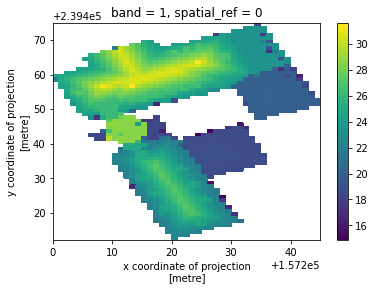

In [41]:
clipped_DSM.plot()

In [42]:
#clipping of DTM

In [43]:
DTM = rioxarray.open_rasterio('DATA\DTM_01.tif',masked=True)

In [44]:
clipped_DTM = DTM.rio.clip(clip_boundaries)

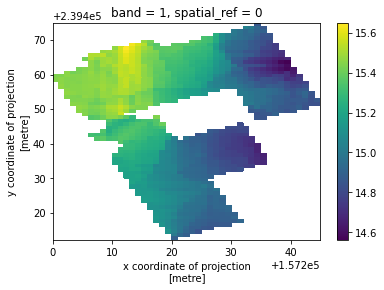

In [45]:
clipped_DTM.plot()

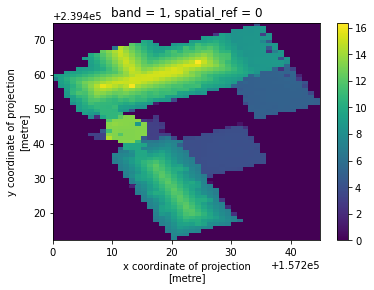

In [46]:
#CLIPPED CHM
clipped_CHM = clipped_DSM - clipped_DTM 
clipped_CHM.compute()
clipped_CHM = clipped_CHM.fillna(0)
clipped_CHM.plot()

In [49]:
#compare with googlemaps streetview!

In [50]:
#3D plotting with ploty 
import plotly.graph_objects as go

import pandas as pd

figure = go.Figure(data=[go.Surface(z = clipped_CHM[0])])

figure.update_layout(title='3D plot of Gemeentehuis Essen')

figure.show()

SyntaxError: invalid syntax (<ipython-input-51-e4a46e8dbb5f>, line 1)

PLOTTING